# PRIMERA PARTE

In [125]:
#Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sn

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import statistics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



#El dataset viene preprocesado

data = pd.read_csv('datos_Preprocesados_Ultimo.csv', sep=',', index_col=0, na_values=['?'], decimal=",")
data

,EB_LC_SEXO,EB_LC_ETNIA,EDAD,EB_LC_DPTO_INFECCION,EB_LC_ESTATURA,EB_LC_NUMERO_LC_ACTIVAS,EB_LC_TIEMPO_EVOLUCION,EB_ULCERA_AREA_1,EB_LC_TTO_MCTO_GLUCANTIME_DOSIS,EF_LC_ESTADO_FINAL_ESTUDIO
SU2050,-0.6201736729460421,-0.8488746876271653,-0.8907539631968076,0.24253562503633308,1.1025015873359132,-0.8402966482242443,-0.9221562693253585,-0.3832495598036824,-1.003398480484348,0
SU2052,-0.6201736729460421,-0.8488746876271653,-1.1336868622504823,0.24253562503633308,-0.8077150666578622,1.5992742659751746,-0.7474319235584486,-0.4430698627878394,-0.6064496310619687,1
SU2066,1.6124515496597103,-0.8488746876271653,-1.3766197613041573,0.24253562503633308,-0.277099329437369,1.5992742659751746,-0.2232588862577184,-0.40489354933605637,0.9813457666275486,1
SU2065,-0.6201736729460421,0.24253562503633308,0.6883098806520789,0.24253562503633308,-0.8077150666578622,-0.8402966482242443,-0.7474319235584486,-0.3149098141312505,-1.4003473299067273,0
SU2073,-0.6201736729460421,0.24253562503633308,-0.5263546146162953,0.24253562503633308,0.6780089975595187,0.13553171745552323,-0.7474319235584486,-0.48562102518765543,0.9813457666275486,1
SU2071,-0.6201736729460421,1.3339459376998315,1.295642128286266,0.24253562503633308,-0.17097618199327036,-0.3523824653843606,-0.5727075777915385,-0.4567009710890792,-1.003398480484348,0
SU2068,-0.6201736729460421,1.3339459376998315,2.6317730730814777,0.24253562503633308,-0.06485303454917173,0.13553171745552323,-0.5727075777915385,-0.3306592703441695,0.9813457666275486,0
SU2158,1.6124515496597103,-0.8488746876271653,1.1741756787594284,0.24253562503633308,-1.6567002462106513,-0.8402966482242443,-0.5727075777915385,0.3575274947022063,-0.2095007816395894,1
SU2159,1.6124515496597103,1.3339459376998315,-0.04048881650894566,0.24253562503633308,-1.444453951322454,-0.8402966482242443,-0.5727075777915385,-0.259924870510709,-1.003398480484348,0
SU2161,1.6124515496597103,1.3339459376998315,-0.8907539631968076,2.42535625036333,-0.7015919192137635,0.623445900295407,2.3976063002459322,-0.48562102518765543,-1.003398480484348,0


0    11
1     7
Name: EF_LC_ESTADO_FINAL_ESTUDIO, dtype: int64


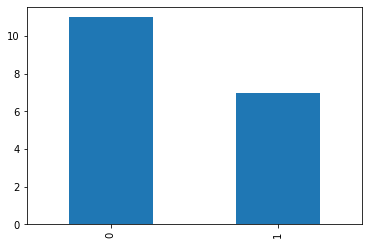

In [126]:
clasificacion = (data['EF_LC_ESTADO_FINAL_ESTUDIO'].value_counts())
print(clasificacion)
clasificacion.plot(kind='bar');

In [127]:
copiaData = data.copy(deep=True) 
target = copiaData['EF_LC_ESTADO_FINAL_ESTUDIO'].copy()
data1 = copiaData.drop(columns=['EF_LC_ESTADO_FINAL_ESTUDIO'])

## DEFINIR KFOLD

In [128]:
kf = KFold(n_splits = 3 ,shuffle = False)
for train_index, test_index in kf.split(data1):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 6  7  8  9 10 11 12 13 14 15 16 17] TEST: [0 1 2 3 4 5]
TRAIN: [ 0  1  2  3  4  5 12 13 14 15 16 17] TEST: [ 6  7  8  9 10 11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: [12 13 14 15 16 17]


# SEGUNDA PARTE

## TÉCNICA BAGGING 

In [11]:
## K-VECINOS MAS CERCANOS
knn_class = KNeighborsClassifier()
parameter_space = {
    'n_neighbors':[(3),(5),(7),(9),(11)],#se desea un numero impar por la votación
    'weights': ['distance','uniform'], #funcion de peso
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],#estructura utilizada para calcular los vecinos mas cercanos
    'leaf_size': [(2),(3),(4),(5),(6),(7),(8),(9),(10),(11),(12)], #cantidad de hojas del algortimo seleccionado(ball tree o kd tree)
    'p': [i for i in range(1,15)], # 2 es la distancia euclidiana , 1 distancia manhattan, arbitrario a p para cualquier otro
}

clf = GridSearchCV(knn_class, parameter_space, n_jobs=-1, cv=kf, scoring='f1',refit=True) 
objetoEntrenado = clf.fit(data1, target)
best_model = objetoEntrenado.best_estimator_

print('Parámetros seleccionados para knn_class:',best_model)
print('Parámetros: ', clf.best_params_)
print('##########################################################################################################')
print('') 

Parámetros seleccionados para knn_class: KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=11, p=4,
                     weights='distance')
Parámetros:  {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 11, 'p': 4, 'weights': 'distance'}
##########################################################################################################



In [12]:
bag_class = BaggingClassifier(base_estimator=clf.best_estimator_)
parametros = {'n_estimators' : [i for i in range(3,101) if i%2 != 0],#se desea un numero impar por la votación
             'max_samples' : [(12),(11)],
             'max_features' : [(3),(4),(5),(6),(7),(8),(9)],
             'bootstrap' : [True],
             }

clf1 = GridSearchCV(bag_class, parametros, n_jobs=-1, cv=kf, scoring='f1', refit=True) #recordar refit
objEntrenado = clf1.fit(data1, target)
mejorModelo = objEntrenado.best_estimator_

print('Parámetros seleccionados para BaggingClassifier:',mejorModelo)
print('##########################################################################################################')
print('')

Parámetros seleccionados para BaggingClassifier: BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='ball_tree',
                                                      leaf_size=2,
                                                      n_neighbors=11, p=4,
                                                      weights='distance'),
                  max_features=3, max_samples=12, n_estimators=3)
##########################################################################################################



In [115]:
mejorModelo = BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='ball_tree',
                                                      leaf_size=2,
                                                      n_neighbors=11, p=4,
                                                      weights='distance'),
                  max_features=3, max_samples=12, n_estimators=3)

print(mejorModelo)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='ball_tree',
                                                      leaf_size=2,
                                                      n_neighbors=11, p=4,
                                                      weights='distance'),
                  max_features=3, max_samples=12, n_estimators=3)


In [29]:
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=11, p=4, weights='distance')

In [30]:
#PRIMERA EVALUACIÓN
scoress_1 = cross_val_score(knn, data1, target, cv=kf, scoring='f1')
print("Métricas cross_validation: ",scoress_1)
print("Media de las métricas de cross_validation: ",scoress_1.mean())
print("Desviación estándar de las métricas de cross_validation: ",scoress_1.std())

Métricas cross_validation:  [0. 1. 0.]
Media de las métricas de cross_validation:  0.3333333333333333
Desviación estándar de las métricas de cross_validation:  0.4714045207910317


In [31]:
#SEGUNDA EVALUACIÓN

scoress_2 = cross_val_score(knn, data1, target, cv=kf, scoring='f1')
print("Métricas cross_validation: ",scoress_2)
print("Media de las métricas de cross_validation: ",scoress_2.mean())
print("Desviación estándar de las métricas de cross_validation: ",scoress_2.std())

Métricas cross_validation:  [0. 1. 0.]
Media de las métricas de cross_validation:  0.3333333333333333
Desviación estándar de las métricas de cross_validation:  0.4714045207910317


In [32]:
#TERCERA EVALUACIÓN
scoress_3 = cross_val_score(knn, data1, target, cv=kf, scoring='f1')
print("Métricas cross_validation: ",scoress_3)
print("Media de las métricas de cross_validation: ",scoress_3.mean())
print("Desviación estándar de las métricas de cross_validation: ",scoress_3.std())

Métricas cross_validation:  [0. 1. 0.]
Media de las métricas de cross_validation:  0.3333333333333333
Desviación estándar de las métricas de cross_validation:  0.4714045207910317


In [116]:
#PRIMERA EVALUACIÓN
scores_1 = cross_val_score(mejorModelo, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",scores_1)
print("Media de las métricas de cross_validation: ",scores_1.mean())
print("Desviación estándar de las métricas de cross_validation: ",scores_1.std())

Métricas cross_validation:  [0.  0.4 0. ]
Media de las métricas de cross_validation:  0.13333333333333333
Desviación estándar de las métricas de cross_validation:  0.1885618083164127


In [117]:
#SEGUNDA EVALUACIÓN
scores_2 = cross_val_score(mejorModelo, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",scores_2)
print("Media de las métricas de cross_validation: ",scores_2.mean())
print("Desviación estándar de las métricas de cross_validation: ",scores_2.std())

Métricas cross_validation:  [0. 0. 0.]
Media de las métricas de cross_validation:  0.0
Desviación estándar de las métricas de cross_validation:  0.0


In [119]:
#TERCERA EVALUACIÓN
scores_3 = cross_val_score(mejorModelo, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",scores_3)
print("Media de las métricas de cross_validation: ",scores_3.mean())
print("Desviación estándar de las métricas de cross_validation: ",scores_3.std())

Métricas cross_validation:  [0.         0.33333333 0.        ]
Media de las métricas de cross_validation:  0.11111111111111112
Desviación estándar de las métricas de cross_validation:  0.15713484026367724


## Gráfica del f1 score obtenido durante las tres iteraciones de la evaluación del modelo simple (k vecinos más cercanos)  y el modelo de ensamble (Bagging Classifier) que presentaron la media más alta

In [76]:
dataMetricas = {'PARTICIONES' : [1,2,3,1,2,3], 'VALORES_METRICAS' : [0.0 , 1.0 , 0.0, 0.0, 0.4 , 0.0], 'ESTIMADORES' : [1,1,1,3,3,3]}
dataMetricas = pd.DataFrame(dataMetricas)
dataMetricas 

,PARTICIONES,VALORES_METRICAS,ESTIMADORES
0,1,0.0,1
1,2,1.0,1
2,3,0.0,1
3,1,0.0,3
4,2,0.4,3
5,3,0.0,3


In [77]:
valores = dataMetricas.groupby(['ESTIMADORES', 'PARTICIONES','VALORES_METRICAS']).size()
valores = valores.reset_index()
valores

,ESTIMADORES,PARTICIONES,VALORES_METRICAS,0
0,1,1,0.0,1
1,1,2,1.0,1
2,1,3,0.0,1
3,3,1,0.0,1
4,3,2,0.4,1
5,3,3,0.0,1


In [78]:
valores = pd.pivot_table(valores, columns = 'ESTIMADORES' , index = 'PARTICIONES', values = 'VALORES_METRICAS')
valores

ESTIMADORES,1,3
PARTICIONES,,
1,0.0,0.0
2,1.0,0.4
3,0.0,0.0


Text(0.5, 0, 'Iteraciones')

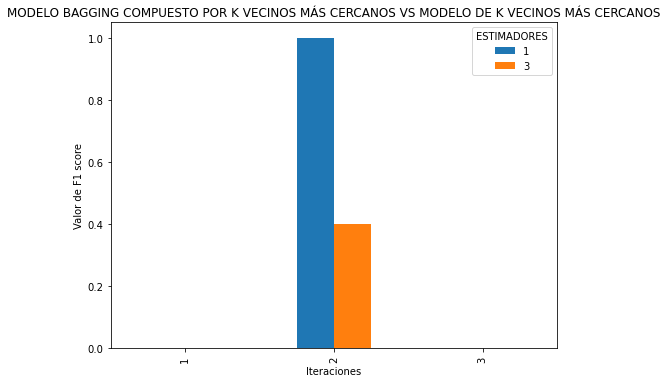

In [79]:
valores = valores.plot(kind='bar', figsize=(8,6), title = 'MODELO BAGGING COMPUESTO POR K VECINOS MÁS CERCANOS VS MODELO DE K VECINOS MÁS CERCANOS');
valores.set_ylabel('Valor de F1 score')
valores.set_xlabel('Iteraciones')

## TÉCNICA BOOSTING

### Gradient Boosting Classifier

In [53]:
boosting = GradientBoostingClassifier()
parameters = {'loss' : ['deviance', 'exponential'], #--
              'learning_rate' : [(0.001),(0.01),(0.1),(0.5),(1)],#--
              'n_estimators' : [(3),(5),(15),(33),(51),(71),(97)],#--
              'criterion' : ['friedman_mse', 'mse'], #--
              'min_samples_split' : [(2),(5),(8),(10),(12)],#--
              'min_samples_leaf' : [(1),(4),(7),(9),(11)],#--
              'max_depth' : [(1),(3),(5),(7),(9)],#--
              'max_features':[(1),(3),(5),(7),(9)],#--
            }

clf2 = GridSearchCV(boosting, parameters, n_jobs=-1, cv=kf, scoring='f1', refit=True) 
objectEntrenado = clf2.fit(data1, target)
mejorModelo2 = clf2.best_estimator_


print('GradientBoostingClassifier:',mejorModelo2)
print('Parámetros: ', clf2.best_params_)

GradientBoostingClassifier: GradientBoostingClassifier(criterion='mse', learning_rate=0.5,
                           loss='exponential', max_depth=5, max_features=3,
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=3)
Parámetros:  {'criterion': 'mse', 'learning_rate': 0.5, 'loss': 'exponential', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 3}


In [184]:
arbol = DecisionTreeClassifier()
param = {'criterion': ['gini', 'entropy'],
         'splitter' : ['best', 'random'],
         'max_depth': [(1),(3),(5),(7),(9)],
         'min_samples_split' : [(2),(5),(8),(10),(12)],
         'min_samples_leaf' : [(1),(4),(7),(9),(11)],
         'max_features' : [(1),(3),(5),(7),(9)],
        }

clf3 = GridSearchCV(arbol, param, n_jobs=-1, cv=kf, scoring='f1', refit=True)
obEntrenado = clf3.fit(data1, target)
modeloObtenido = clf3.best_estimator_

print('Mejores parámetros de DecisionTreeClassifier : ', clf3.best_params_)
print('#########################################################################################################')
print(' ')

Mejores parámetros de DecisionTreeClassifier :  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'best'}
#########################################################################################################
 


In [129]:
mejorModelo2 = GradientBoostingClassifier(criterion='mse', learning_rate=0.5,
                           loss='exponential', max_depth=5, max_features=3,
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=3)

print(mejorModelo2)


GradientBoostingClassifier(criterion='mse', learning_rate=0.5,
                           loss='exponential', max_depth=5, max_features=3,
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=3)


In [186]:
#PRIMERA EVALUACIÓN
scoresss_1 = cross_val_score(modeloObtenido, data1, target, cv=kf, scoring='f1')
print("Métricas cross_validation: ",scoresss_1)
print("Media de las métricas de cross_validation: ",scoresss_1.mean())
print("Desviación estándar de las métricas de cross_validation: ",scoresss_1.std())

Métricas cross_validation:  [0.         0.         0.85714286]
Media de las métricas de cross_validation:  0.2857142857142857
Desviación estándar de las métricas de cross_validation:  0.40406101782088427


In [187]:
#SEGUNDA EVALUACIÓN
scoresss_2 = cross_val_score(modeloObtenido, data1, target, cv=kf, scoring='f1')
print("Métricas cross_validation: ",scoresss_2)
print("Media de las métricas de cross_validation: ",scoresss_2.mean())
print("Desviación estándar de las métricas de cross_validation: ",scoresss_2.std())

Métricas cross_validation:  [0.4  0.   0.75]
Media de las métricas de cross_validation:  0.3833333333333333
Desviación estándar de las métricas de cross_validation:  0.30641293851417056


In [188]:
#TERCERA EVALUACIÓN
scoresss_3 = cross_val_score(modeloObtenido, data1, target, cv=kf, scoring='f1')
print("Métricas cross_validation: ",scoresss_3)
print("Media de las métricas de cross_validation: ",scoresss_3.mean())
print("Desviación estándar de las métricas de cross_validation: ",scoresss_3.std())

Métricas cross_validation:  [0.   0.   0.75]
Media de las métricas de cross_validation:  0.24999999999999997
Desviación estándar de las métricas de cross_validation:  0.35355339059327373


[Text(200.88000000000002, 181.2, 'X[5] <= 1.111\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(133.92000000000002, 108.72, 'X[8] <= -0.606\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

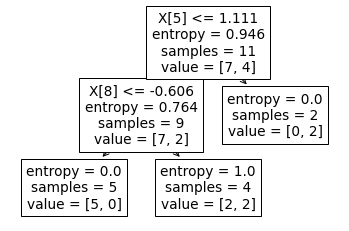

In [189]:
from sklearn import tree

#Una de las particiones de kf
dataPequeña = data1.iloc[0:11]
targetPequeña = target.iloc[0:11]

modeloObtenido.fit(dataPequeña, targetPequeña)
tree.plot_tree(modeloObtenido)

[Text(167.4, 163.07999999999998, 'X[8] <= -0.805\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]')]

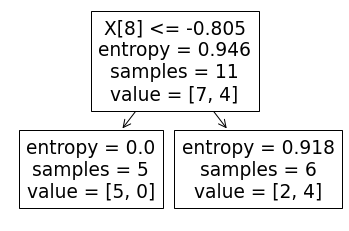

In [190]:
from sklearn import tree

#Una de las particiones de kf
dataPequeña = data1.iloc[0:11]
targetPequeña = target.iloc[0:11]

modeloObtenido.fit(dataPequeña, targetPequeña)
tree.plot_tree(modeloObtenido)

In [140]:
#PRIMERA EVALUACIÓN
scores1 = cross_val_score(mejorModelo2, data1, target, cv=kf, scoring='f1')

print("Métricas cross_validation: ",scores1)
print("Media de las métricas de cross_validation: ",scores1.mean())
print("Desviación estándar de las métricas de cross_validation: ",scores1.std())

Métricas cross_validation:  [0.5        0.66666667 0.85714286]
Media de las métricas de cross_validation:  0.6746031746031745
Desviación estándar de las métricas de cross_validation:  0.14591092310198597


In [197]:
#SEGUNDA EVALUACIÓN
scores2 = cross_val_score(mejorModelo2, data1, target, cv=kf, scoring='f1')

print("Métricas cross_validation: ",scores2)
print("Media de las métricas de cross_validation: ",scores2.mean())
print("Desviación estándar de las métricas de cross_validation: ",scores2.std())

Métricas cross_validation:  [0.         0.5        0.85714286]
Media de las métricas de cross_validation:  0.4523809523809524
Desviación estándar de las métricas de cross_validation:  0.35154340619603336


In [206]:
#TERCERA EVALUACIÓN
scores3 = cross_val_score(mejorModelo2, data1, target, cv=kf, scoring='f1')

print("Métricas cross_validation: ",scores3)
print("Media de las métricas de cross_validation: ",scores3.mean())
print("Desviación estándar de las métricas de cross_validation: ",scores3.std())

Métricas cross_validation:  [0.         0.66666667 0.5       ]
Media de las métricas de cross_validation:  0.38888888888888884
Desviación estándar de las métricas de cross_validation:  0.2832788618662658


## Gráfica del f1 score obtenido durante las tres iteraciones de la evaluación del modelo simple (árboles de decisión)  y el modelo de ensamble (Gradient Boosting Classifier) que presentaron la media más alta

In [275]:
dataMetricas1 = {'PARTICIONES' : [1,2,3,1,2,3], 'VALORES_METRICAS' : [0.4 , 0.0 , 0.75, 0.5, 0.67 , 0.86], 'ESTIMADORES' : [1,1,1,3,3,3]}
dataMetricas1 = pd.DataFrame(dataMetricas1)
dataMetricas1

,PARTICIONES,VALORES_METRICAS,ESTIMADORES
0,1,0.40,1
1,2,0.00,1
2,3,0.75,1
3,1,0.50,3
4,2,0.67,3
5,3,0.86,3


In [276]:
valores1 = dataMetricas1.groupby(['ESTIMADORES', 'PARTICIONES','VALORES_METRICAS']).size()
valores1 = valores1.reset_index()
valores1

,ESTIMADORES,PARTICIONES,VALORES_METRICAS,0
0,1,1,0.40,1
1,1,2,0.00,1
2,1,3,0.75,1
3,3,1,0.50,1
4,3,2,0.67,1
5,3,3,0.86,1


In [277]:
valores1 = pd.pivot_table(valores1, columns = 'ESTIMADORES' , index = 'PARTICIONES', values = 'VALORES_METRICAS')
valores1

ESTIMADORES,1,3
PARTICIONES,,
1,0.40,0.50
2,0.00,0.67
3,0.75,0.86


Text(0.5, 0, 'Iteraciones')

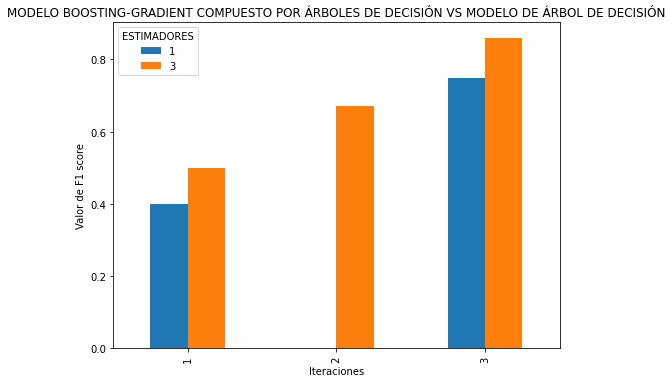

In [278]:
valores1 = valores1.plot(kind='bar', figsize=(8,6), title = 'MODELO BOOSTING-GRADIENT COMPUESTO POR ÁRBOLES DE DECISIÓN VS MODELO DE ÁRBOL DE DECISIÓN');
valores1.set_ylabel('Valor de F1 score')
valores1.set_xlabel('Iteraciones')

### AdaBoost Classifier

In [235]:
#Las evaluaciones de este modelo simple ya se hicieron anteriormente en la técnica de Gradient Boosting Classifier 
#usando la misma cantidad de datos, por lo tanto, se usa el modelo antes construido.

arbol = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, max_features = 5, min_samples_leaf = 1, min_samples_split = 8, splitter = 'best')


print('Mejores parámetros de DecisionTreeClassifier : ', arbol)
print('#########################################################################################################')
print(' ')

Mejores parámetros de DecisionTreeClassifier :  DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=5,
                       min_samples_split=8)
#########################################################################################################
 


In [252]:
Ada =  AdaBoostClassifier(base_estimator=arbol)
paramet = {'n_estimators' : [i for i in range(3,101) if i%2 != 0],
           'learning_rate' : [(0.001),(0.01),(0.1),(0.5),(1)],
            }
clf4 = GridSearchCV(Ada, paramet, n_jobs=-1, cv=kf, scoring='f1', refit=True)
ObjeEntrenado = clf4.fit(data1, target)
mejorModelo3 = clf4.best_estimator_

print('Mejores parámetros de AdaBoostClassifier : ', clf4.best_params_)
print('AdaBoostClassifier :', mejorModelo3 )
print('#########################################################################################################')
print(' ')

Mejores parámetros de AdaBoostClassifier :  {'learning_rate': 0.01, 'n_estimators': 5}
AdaBoostClassifier : AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=7,
                                                         max_features=5,
                                                         min_samples_split=8),
                   learning_rate=0.01, n_estimators=5)
#########################################################################################################
 


In [123]:
mejorModelo3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=7,
                                                         max_features=5,
                                                         min_samples_split=8),
                   learning_rate=0.01, n_estimators=5)

In [260]:
scores11 = cross_val_score(mejorModelo3, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",scores11)
print("Media de las métricas de cross_validation: ",scores11.mean())
print("Desviación estándar de las métricas de cross_validation: ",scores11.std())

Métricas cross_validation:  [0.         0.         0.85714286]
Media de las métricas de cross_validation:  0.2857142857142857
Desviación estándar de las métricas de cross_validation:  0.40406101782088427


In [254]:
scores22 = cross_val_score(mejorModelo3, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",scores22)
print("Media de las métricas de cross_validation: ",scores22.mean())
print("Desviación estándar de las métricas de cross_validation: ",scores22.std())

Métricas cross_validation:  [0.         0.66666667 0.75      ]
Media de las métricas de cross_validation:  0.47222222222222215
Desviación estándar de las métricas de cross_validation:  0.3356401659331825


In [273]:
scores33 = cross_val_score(mejorModelo3, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",scores33)
print("Media de las métricas de cross_validation: ",scores33.mean())
print("Desviación estándar de las métricas de cross_validation: ",scores33.std())

Métricas cross_validation:  [0.   0.   0.75]
Media de las métricas de cross_validation:  0.24999999999999997
Desviación estándar de las métricas de cross_validation:  0.35355339059327373


## Gráfica del f1 score obtenido durante las tres iteraciones de la evaluación del modelo simple (árboles de decisión)  y el modelo de ensamble (AdaBoostClassifier) que presentaron la media más alta

In [279]:
dataMetricas2 = {'PARTICIONES' : [1,2,3,1,2,3], 'VALORES_METRICAS' : [0.4 , 0.0 , 0.75, 0.0, 0.67, 0.75], 'ESTIMADORES' : [1,1,1,5,5,5]}
dataMetricas2 = pd.DataFrame(dataMetricas2)
dataMetricas2

,PARTICIONES,VALORES_METRICAS,ESTIMADORES
0,1,0.40,1
1,2,0.00,1
2,3,0.75,1
3,1,0.00,5
4,2,0.67,5
5,3,0.75,5


In [280]:
valores2 = dataMetricas2.groupby(['ESTIMADORES', 'PARTICIONES','VALORES_METRICAS']).size()
valores2 = valores2.reset_index()
valores2

,ESTIMADORES,PARTICIONES,VALORES_METRICAS,0
0,1,1,0.40,1
1,1,2,0.00,1
2,1,3,0.75,1
3,5,1,0.00,1
4,5,2,0.67,1
5,5,3,0.75,1


In [281]:
valores2 = pd.pivot_table(valores2, columns = 'ESTIMADORES' , index = 'PARTICIONES', values = 'VALORES_METRICAS')
valores2

ESTIMADORES,1,5
PARTICIONES,,
1,0.40,0.00
2,0.00,0.67
3,0.75,0.75


Text(0.5, 0, 'Iteraciones')

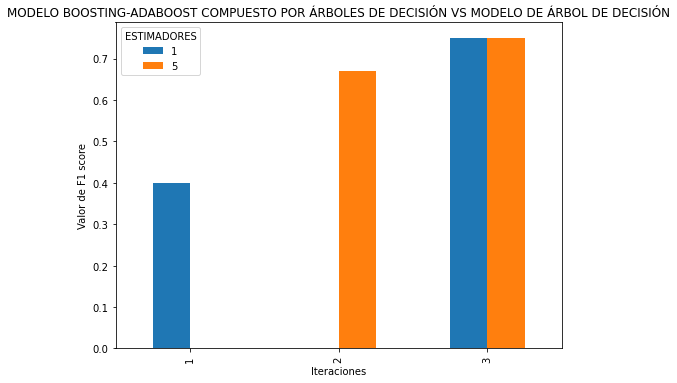

In [282]:
valores2 = valores2.plot(kind='bar', figsize=(8,6), title = 'MODELO BOOSTING-ADABOOST COMPUESTO POR ÁRBOLES DE DECISIÓN VS MODELO DE ÁRBOL DE DECISIÓN');
valores2.set_ylabel('Valor de F1 score')
valores2.set_xlabel('Iteraciones')

# TÉCNICA STACKING

In [52]:
#1)Máquinas de vectores de soporte

mvs = SVC()
atributos = {'C': [(0.0001),(0.001),(0.01),(0.02),(0.1),(0.3),(1.0),(10),(100)],
         'kernel' : ['linear', 'poly','rbf', 'sigmoid'],
         'gamma': [(0.0001),(0.001),(0.01),(0.02),(0.1),(0.3),(1.0),(10),(100)],
         'degree' : [(2),(3),(4),(5)],
          }
clf5 = GridSearchCV(mvs, atributos, n_jobs=-1, cv=kf, refit=True)
objectT = clf5.fit(data1, target)
bestModelo = clf5.best_estimator_

print('Mejores parámetros de SVC: ',  clf5.best_params_)

Mejores parámetros de SVC:  {'C': 1.0, 'degree': 2, 'gamma': 0.0001, 'kernel': 'linear'}


In [56]:
#2) K vecinos más cercanos

#Se hace una selección nuevamente del modelo de k vecinos más cercanos, y esta vez se vuelve a estimar los valores de los parámetros 
# dado que la técnica de stacking divide internamente los datos de entrenamiento para entrenar cada estimador base a través de validación cruzada, es decir que 
# esta estrategia usa una cantidad menor para el entrenamiento de dichos estimadores base.

knn_class_Stack = KNeighborsClassifier()
parameter_space11 = {
    'n_neighbors':[(3),(5)],#se desea un numero impar por la votación
    'weights': ['distance','uniform'], #funcion de peso
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],#estructura utilizada para calcular los vecinos mas cercanos
    'leaf_size': [(2),(3),(4),(5),(6)], #cantidad de hojas del algortimo seleccionado(ball tree o kd tree)
    'p': [i for i in range(1,15)], # 2 es la distancia euclidiana , 1 distancia manhattan, arbitrario a p para cualquier otro
}

clfUlt = GridSearchCV(knn_class_Stack, parameter_space11, n_jobs=-1, cv=kf, scoring='f1',refit=True) 
objetoEntrenadoKnn = clfUlt.fit(data1, target)
best_knn_Stack = objetoEntrenadoKnn.best_estimator_

print('Parámetros seleccionados para knn_class_Stack:',best_knn_Stack)
print('Parámetros: ', clfUlt.best_params_)
print('##########################################################################################################')
print('') 

Parámetros seleccionados para knn_class_Stack: KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=3, p=9,
                     weights='distance')
Parámetros:  {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 3, 'p': 9, 'weights': 'distance'}
##########################################################################################################



In [63]:
#3)árbol de decisión

#Se hace una selección nuevamente del modelo de árboles de decisión, y esta vez se vuelve a estimar los valores de los parámetros 
# dado que la técnica de stacking divide internamente los datos de entrenamiento para entrenar cada estimador base a través de validación cruzada, es decir que 
# esta estrategia usa una cantidad menor para el entrenamiento de dichos estimadores base.

arbol_Stack = DecisionTreeClassifier()
param11 = {'criterion': ['gini', 'entropy'],
         'splitter' : ['best', 'random'],
         'max_depth': [(1),(3),(5),(7),(9)],
         'min_samples_split' : [(2),(4),(6)],
         'min_samples_leaf' : [(1),(3),(5)],
         'max_features' : [(1),(3),(5),(7),(9)],
        }

clfStack = GridSearchCV(arbol_Stack, param11, n_jobs=-1, cv=kf, scoring='f1', refit=True)
obEntrenadoArbol = clfStack.fit(data1, target)
modeloObtenidoArbol = clfStack.best_estimator_

print('Parámetros seleccionados para arbol_Stack:', modeloObtenidoArbol)
print('Parámetros: ', clfStack.best_params_)
print('##########################################################################################################')
print('') 

Parámetros seleccionados para arbol_Stack: DecisionTreeClassifier(max_depth=9, max_features=5, min_samples_split=6)
Parámetros:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'best'}
##########################################################################################################



In [71]:
#4)Regresión logística
logR = LogisticRegression()
atribut = {
           'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           }

clf6 = GridSearchCV(logR, atribut, n_jobs=-1, cv=kf, scoring='f1', refit=True)
obje = clf6.fit(data1, target)
best= clf6.best_estimator_

print('Mejores parámetros de Logistic Regression : ',  clf6.best_params_)

Mejores parámetros de Logistic Regression :  {'solver': 'newton-cg'}


In [75]:
#Definición de los vectores que contienen los estimadores de primer y segundo nivel.
modelos = [('MVS', bestModelo),('KNC',best_knn_Stack),('DTC', modeloObtenidoArbol)]
modeloSalida = best

In [81]:
#Stacking Classifier

stack =  StackingClassifier(estimators=modelos, final_estimator= modeloSalida)
atr = {'cv' : [(2),(3),(4)],
       'passthrough' : ['True', 'False'],
        }

clf7 = GridSearchCV(stack, atr, n_jobs=-1, cv=kf, scoring='f1', refit=True)
ob = clf7.fit(data1, target)
modeloStack = clf7.best_estimator_

print('Mejores parámetros de StackingClassifier : ',  clf7.best_params_)

Mejores parámetros de StackingClassifier :  {'cv': 3, 'passthrough': 'True'}


In [124]:
modeloStack =  StackingClassifier(estimators=modelos, final_estimator= modeloSalida, cv=3, passthrough='True')

### Evaluaciones del modelo svc

In [53]:
evaluacion1 = cross_val_score(bestModelo, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",evaluacion1)
print("Media de las métricas de cross_validation: ",evaluacion1.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion1.std())

Métricas cross_validation:  [0.5 1.  0.8]
Media de las métricas de cross_validation:  0.7666666666666666
Desviación estándar de las métricas de cross_validation:  0.20548046676563256


In [54]:
evaluacion2 = cross_val_score(bestModelo, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",evaluacion2)
print("Media de las métricas de cross_validation: ",evaluacion2.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion2.std())

Métricas cross_validation:  [0.5 1.  0.8]
Media de las métricas de cross_validation:  0.7666666666666666
Desviación estándar de las métricas de cross_validation:  0.20548046676563256


In [55]:
evaluacion3 = cross_val_score(bestModelo, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica
print("Métricas cross_validation: ",evaluacion3)
print("Media de las métricas de cross_validation: ",evaluacion3.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion3.std())

Métricas cross_validation:  [0.5 1.  0.8]
Media de las métricas de cross_validation:  0.7666666666666666
Desviación estándar de las métricas de cross_validation:  0.20548046676563256


### Evaluaciones del modelo de k vecinos más cercanos

In [57]:
evaluacion11 = cross_val_score(best_knn_Stack, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",evaluacion11)
print("Media de las métricas de cross_validation: ",evaluacion11.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion11.std())

Métricas cross_validation:  [0.  0.  0.5]
Media de las métricas de cross_validation:  0.16666666666666666
Desviación estándar de las métricas de cross_validation:  0.23570226039551584


In [58]:
evaluacion22 = cross_val_score(best_knn_Stack, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",evaluacion22)
print("Media de las métricas de cross_validation: ",evaluacion22.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion22.std())

Métricas cross_validation:  [0.  0.  0.5]
Media de las métricas de cross_validation:  0.16666666666666666
Desviación estándar de las métricas de cross_validation:  0.23570226039551584


In [59]:
evaluacion33 = cross_val_score(best_knn_Stack, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",evaluacion33)
print("Media de las métricas de cross_validation: ",evaluacion33.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion33.std())

Métricas cross_validation:  [0.  0.  0.5]
Media de las métricas de cross_validation:  0.16666666666666666
Desviación estándar de las métricas de cross_validation:  0.23570226039551584


### Evaluaciones del modelo de árboles de decisión

In [64]:
evaluacion111 = cross_val_score(modeloObtenidoArbol, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",evaluacion111)
print("Media de las métricas de cross_validation: ",evaluacion111.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion111.std())

Métricas cross_validation:  [0.         0.         0.66666667]
Media de las métricas de cross_validation:  0.2222222222222222
Desviación estándar de las métricas de cross_validation:  0.31426968052735443


In [65]:
evaluacion222 = cross_val_score(modeloObtenidoArbol, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",evaluacion222)
print("Media de las métricas de cross_validation: ",evaluacion222.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion222.std())

Métricas cross_validation:  [0.75 0.   0.  ]
Media de las métricas de cross_validation:  0.24999999999999997
Desviación estándar de las métricas de cross_validation:  0.35355339059327373


In [70]:
evaluacion333 = cross_val_score(modeloObtenidoArbol, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",evaluacion333)
print("Media de las métricas de cross_validation: ",evaluacion333.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion333.std())

Métricas cross_validation:  [0.         0.66666667 0.5       ]
Media de las métricas de cross_validation:  0.38888888888888884
Desviación estándar de las métricas de cross_validation:  0.2832788618662658


### Evaluaciones del modelo de regresión logística

In [72]:
evaluacion_1 = cross_val_score(best, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",evaluacion_1)
print("Media de las métricas de cross_validation: ",evaluacion_1.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion_1.std())

Métricas cross_validation:  [0.         0.66666667 0.8       ]
Media de las métricas de cross_validation:  0.48888888888888893
Desviación estándar de las métricas de cross_validation:  0.3499559055116361


In [73]:
evaluacion_2 = cross_val_score(best, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",evaluacion_2)
print("Media de las métricas de cross_validation: ",evaluacion_2.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion_2.std())

Métricas cross_validation:  [0.         0.66666667 0.8       ]
Media de las métricas de cross_validation:  0.48888888888888893
Desviación estándar de las métricas de cross_validation:  0.3499559055116361


In [74]:
evaluacion_3 = cross_val_score(best, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",evaluacion_3)
print("Media de las métricas de cross_validation: ",evaluacion_3.mean())
print("Desviación estándar de las métricas de cross_validation: ",evaluacion_3.std())

Métricas cross_validation:  [0.         0.66666667 0.8       ]
Media de las métricas de cross_validation:  0.48888888888888893
Desviación estándar de las métricas de cross_validation:  0.3499559055116361


### Cross-validation utilizando el mejor modelo de StackingClassifier

In [88]:
scoresStack = cross_val_score(modeloStack, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",scoresStack)
print("Media de las métricas de cross_validation: ",scoresStack.mean())
print("Desviación estándar de las métricas de cross_validation: ",scoresStack.std())

Métricas cross_validation:  [0.  0.  0.8]
Media de las métricas de cross_validation:  0.26666666666666666
Desviación estándar de las métricas de cross_validation:  0.3771236166328254


In [89]:
scoresStack1 = cross_val_score(modeloStack, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",scoresStack1)
print("Media de las métricas de cross_validation: ",scoresStack1.mean())
print("Desviación estándar de las métricas de cross_validation: ",scoresStack1.std())

Métricas cross_validation:  [0.  0.  0.8]
Media de las métricas de cross_validation:  0.26666666666666666
Desviación estándar de las métricas de cross_validation:  0.3771236166328254


In [90]:
scoresStack2 = cross_val_score(modeloStack, data1, target, cv=kf, scoring='f1')#Solo se puede escoger una métrica

print("Métricas cross_validation: ",scoresStack2)
print("Media de las métricas de cross_validation: ",scoresStack2.mean())
print("Desviación estándar de las métricas de cross_validation: ",scoresStack2.std())

Métricas cross_validation:  [0.  0.  0.8]
Media de las métricas de cross_validation:  0.26666666666666666
Desviación estándar de las métricas de cross_validation:  0.3771236166328254


## Gráfica del f1 score obtenido durante las tres iteraciones de la evaluación del modelo simple (Máquinas de vectores de soporte)  y el modelo de ensamble (Stacking Classifier) que presentaron la media más alta

In [114]:
dataMetricas3 = {'PARTICIONES' : [1,2,3,1,2,3], 'VALORES_METRICAS' : [0.50 , 1.00 , 0.80, 0.0, 0.0, 0.80], 'ESTIMADORES' : [1,1,1,4,4,4]}
dataMetricas3 = pd.DataFrame(dataMetricas3)
dataMetricas3

,PARTICIONES,VALORES_METRICAS,ESTIMADORES
0,1,0.5,1
1,2,1.0,1
2,3,0.8,1
3,1,0.0,4
4,2,0.0,4
5,3,0.8,4


In [115]:
valores3 = dataMetricas3.groupby(['ESTIMADORES', 'PARTICIONES','VALORES_METRICAS']).size()
valores3 = valores3.reset_index()
valores3

,ESTIMADORES,PARTICIONES,VALORES_METRICAS,0
0,1,1,0.5,1
1,1,2,1.0,1
2,1,3,0.8,1
3,4,1,0.0,1
4,4,2,0.0,1
5,4,3,0.8,1


In [116]:
valores3 = pd.pivot_table(valores3, columns = 'ESTIMADORES' , index = 'PARTICIONES', values = 'VALORES_METRICAS')
valores3

ESTIMADORES,1,4
PARTICIONES,,
1,0.5,0.0
2,1.0,0.0
3,0.8,0.8


Text(0.5, 0, 'Iteraciones')

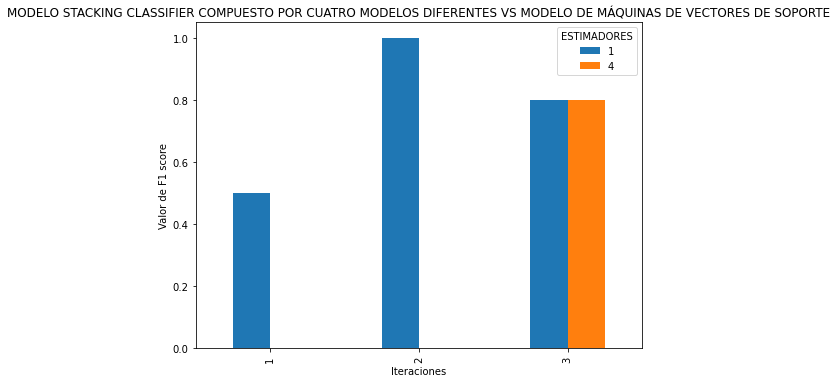

In [117]:
valores3 = valores3.plot(kind='bar', figsize=(8,6), title = 'MODELO STACKING CLASSIFIER COMPUESTO POR CUATRO MODELOS DIFERENTES VS MODELO DE MÁQUINAS DE VECTORES DE SOPORTE');
valores3.set_ylabel('Valor de F1 score')
valores3.set_xlabel('Iteraciones')

## Gráfica del f1 score obtenido durante las tres iteraciones de la evaluación del modelo simple (K vecinos más cercanos)  y el modelo de ensamble (Stacking Classifier) que presentaron la media más alta

In [95]:
dataMetricas4 = {'PARTICIONES' : [1,2,3,1,2,3], 'VALORES_METRICAS' : [0.0 , 0.0 , 0.50, 0.0, 0.0, 0.80], 'ESTIMADORES' : [1,1,1,4,4,4]}
dataMetricas4 = pd.DataFrame(dataMetricas4)
dataMetricas4

,PARTICIONES,VALORES_METRICAS,ESTIMADORES
0,1,0.0,1
1,2,0.0,1
2,3,0.5,1
3,1,0.0,4
4,2,0.0,4
5,3,0.8,4


In [96]:
valores4 = dataMetricas4.groupby(['ESTIMADORES', 'PARTICIONES','VALORES_METRICAS']).size()
valores4 = valores4.reset_index()
valores4

,ESTIMADORES,PARTICIONES,VALORES_METRICAS,0
0,1,1,0.0,1
1,1,2,0.0,1
2,1,3,0.5,1
3,4,1,0.0,1
4,4,2,0.0,1
5,4,3,0.8,1


In [97]:
valores4 = pd.pivot_table(valores4, columns = 'ESTIMADORES' , index = 'PARTICIONES', values = 'VALORES_METRICAS')
valores4

ESTIMADORES,1,4
PARTICIONES,,
1,0.0,0.0
2,0.0,0.0
3,0.5,0.8


Text(0.5, 0, 'Iteraciones')

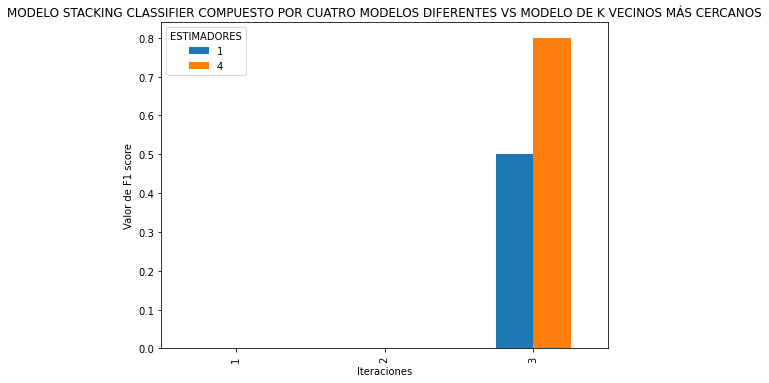

In [98]:
valores4 = valores4.plot(kind='bar', figsize=(8,6), title = 'MODELO STACKING CLASSIFIER COMPUESTO POR CUATRO MODELOS DIFERENTES VS MODELO DE K VECINOS MÁS CERCANOS');
valores4.set_ylabel('Valor de F1 score')
valores4.set_xlabel('Iteraciones')

## Gráfica del f1 score obtenido durante las tres iteraciones de la evaluación del modelo simple (Árboles de decisión)  y el modelo de ensamble (Stacking Classifier) que presentaron la media más alta

In [108]:
dataMetricas5 = {'PARTICIONES' : [1,2,3,1,2,3], 'VALORES_METRICAS' : [0.0 , 0.67 , 0.50, 0.0, 0.0, 0.80], 'ESTIMADORES' : [1,1,1,4,4,4]}
dataMetricas5 = pd.DataFrame(dataMetricas5)
dataMetricas5

,PARTICIONES,VALORES_METRICAS,ESTIMADORES
0,1,0.00,1
1,2,0.67,1
2,3,0.50,1
3,1,0.00,4
4,2,0.00,4
5,3,0.80,4


In [109]:
valores5 = dataMetricas5.groupby(['ESTIMADORES', 'PARTICIONES','VALORES_METRICAS']).size()
valores5 = valores5.reset_index()
valores5

,ESTIMADORES,PARTICIONES,VALORES_METRICAS,0
0,1,1,0.00,1
1,1,2,0.67,1
2,1,3,0.50,1
3,4,1,0.00,1
4,4,2,0.00,1
5,4,3,0.80,1


In [110]:
valores5 = pd.pivot_table(valores5, columns = 'ESTIMADORES' , index = 'PARTICIONES', values = 'VALORES_METRICAS')
valores5

ESTIMADORES,1,4
PARTICIONES,,
1,0.00,0.0
2,0.67,0.0
3,0.50,0.8


Text(0.5, 0, 'Iteraciones')

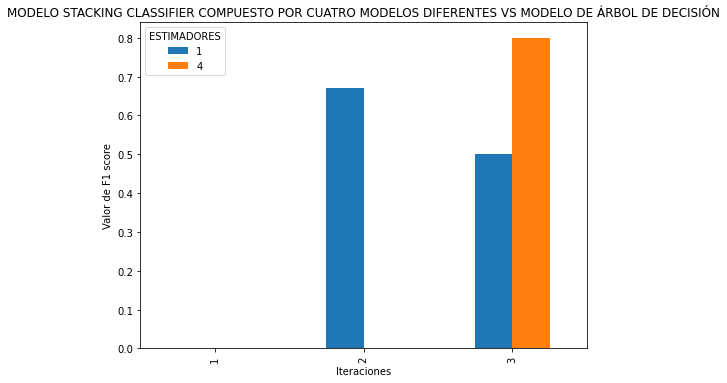

In [111]:
valores5 = valores5.plot(kind='bar', figsize=(8,6), title = 'MODELO STACKING CLASSIFIER COMPUESTO POR CUATRO MODELOS DIFERENTES VS MODELO DE ÁRBOL DE DECISIÓN');
valores5.set_ylabel('Valor de F1 score')
valores5.set_xlabel('Iteraciones')

## Gráfica del f1 score obtenido durante las tres iteraciones de la evaluación del modelo simple (Regresión logística)  y el modelo de ensamble (Stacking Classifier) que presentaron la media más alta

In [103]:
dataMetricas6 = {'PARTICIONES' : [1,2,3,1,2,3], 'VALORES_METRICAS' : [0.0 , 0.67 , 0.80, 0.0, 0.0, 0.80], 'ESTIMADORES' : [1,1,1,4,4,4]}
dataMetricas6 = pd.DataFrame(dataMetricas6)
dataMetricas6

,PARTICIONES,VALORES_METRICAS,ESTIMADORES
0,1,0.00,1
1,2,0.67,1
2,3,0.80,1
3,1,0.00,4
4,2,0.00,4
5,3,0.80,4


In [104]:
valores6 = dataMetricas6.groupby(['ESTIMADORES', 'PARTICIONES','VALORES_METRICAS']).size()
valores6 = valores6.reset_index()
valores6

,ESTIMADORES,PARTICIONES,VALORES_METRICAS,0
0,1,1,0.00,1
1,1,2,0.67,1
2,1,3,0.80,1
3,4,1,0.00,1
4,4,2,0.00,1
5,4,3,0.80,1


In [105]:
valores6 = pd.pivot_table(valores6, columns = 'ESTIMADORES' , index = 'PARTICIONES', values = 'VALORES_METRICAS')
valores6

ESTIMADORES,1,4
PARTICIONES,,
1,0.00,0.0
2,0.67,0.0
3,0.80,0.8


Text(0.5, 0, 'Iteraciones')

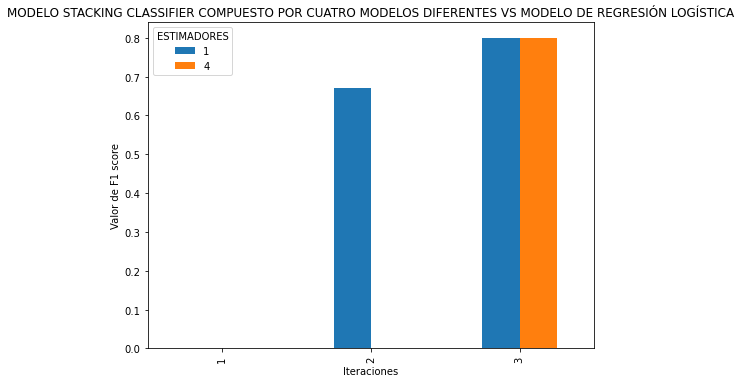

In [106]:
valores6 = valores6.plot(kind='bar', figsize=(8,6), title = 'MODELO STACKING CLASSIFIER COMPUESTO POR CUATRO MODELOS DIFERENTES VS MODELO DE REGRESIÓN LOGÍSTICA');
valores6.set_ylabel('Valor de F1 score')
valores6.set_xlabel('Iteraciones')

## ENTRENANDO EL MODELO DE ENSAMBLE QUE PRESENTÓ EL MAYOR F1 SCORE

In [130]:
modeloEntrenadoEnsamble = mejorModelo2.fit(data1, target)

### Cross-validation utilizando el mejor modelo de AdaBoostClassifier

# TERCERA PARTE

In [131]:
import joblib

# Guardar el modelo
filename = 'modeloMejorDesempeno.joblib'
joblib.dump(modeloEntrenadoEnsamble, filename)


['modeloMejorDesempeno.joblib']

In [ ]:
 
# Si se quiere usar el modelo hay que cargarlo de la siguiente forma:

model = joblib.load(filename)

result = model.predict()#Hay que pasarle la data
print(result)
